**Descriptive statistics**

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('transaction_data.csv')

## Remove duplicates

In [4]:
initial_row_count = len(data)
initial_fraud_cases = data['isFraud'].sum()

data_deduped = data.drop_duplicates()

deduped_row_count = len(data_deduped)
deduped_fraud_cases = data_deduped['isFraud'].sum()

fraud_percentage_before = (initial_fraud_cases / initial_row_count) * 100
fraud_percentage_after = (deduped_fraud_cases / deduped_row_count) * 100

print(f"Row count before deduplication: {initial_row_count}")
print(f"Row count after deduplication: {deduped_row_count}")
print(f"Number of rows removed: {initial_row_count - deduped_row_count}")

print(f"Fraud percentage before deduplication: {fraud_percentage_before}%")
print(f"Fraud percentage after deduplication: {fraud_percentage_after}%")

if initial_row_count == deduped_row_count:
    print("No duplicates were found.")
else:
    print("Duplicates were removed.")

if fraud_percentage_before == fraud_percentage_after:
    print("Fraud percentage remained the same after removing duplicates.")
else:
    print("Fraud percentage changed after removing duplicates.")

Row count before deduplication: 6362620
Row count after deduplication: 6362620
Number of rows removed: 0
Fraud percentage before deduplication: 0.12908204481801522%
Fraud percentage after deduplication: 0.12908204481801522%
No duplicates were found.
Fraud percentage remained the same after removing duplicates.


# Descriptive stats
-	Significant skewness among all variables except step
-	clear correlation between newbalanceOrig and oldbalanceOrg variables, keep 1 of them
-	clear correlation between newbalanceDest and oldbalanceDest, keep one of them.


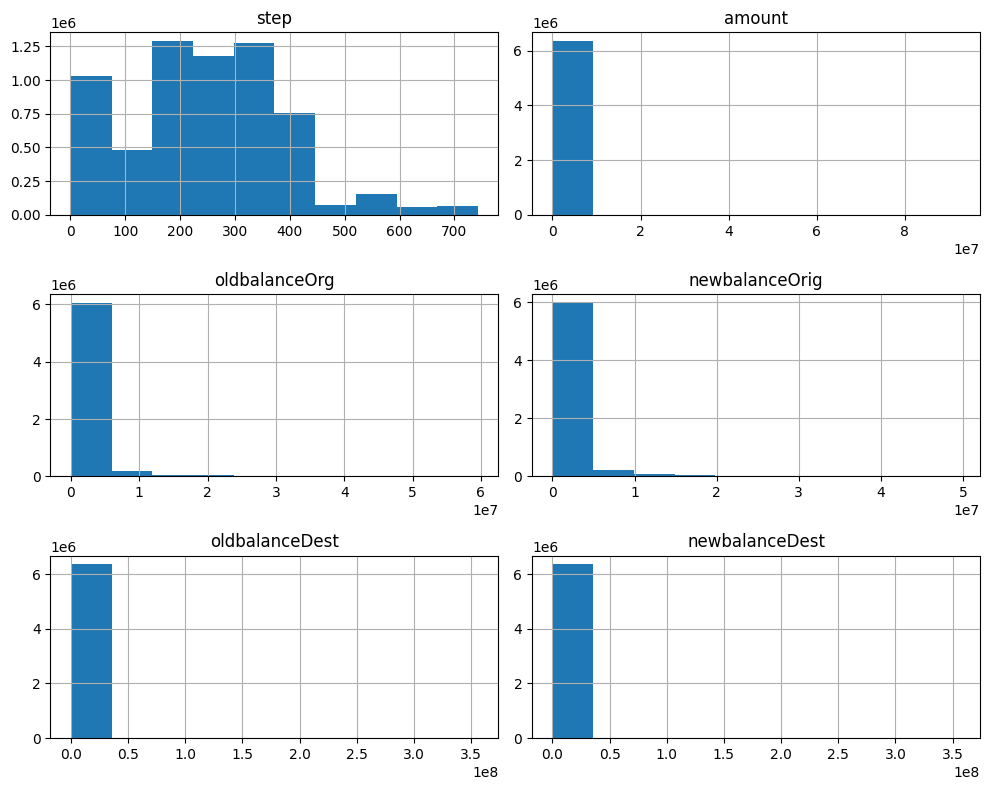

In [5]:
# histograms (numerical)
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
numerical_data = data[numerical_columns]
numerical_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

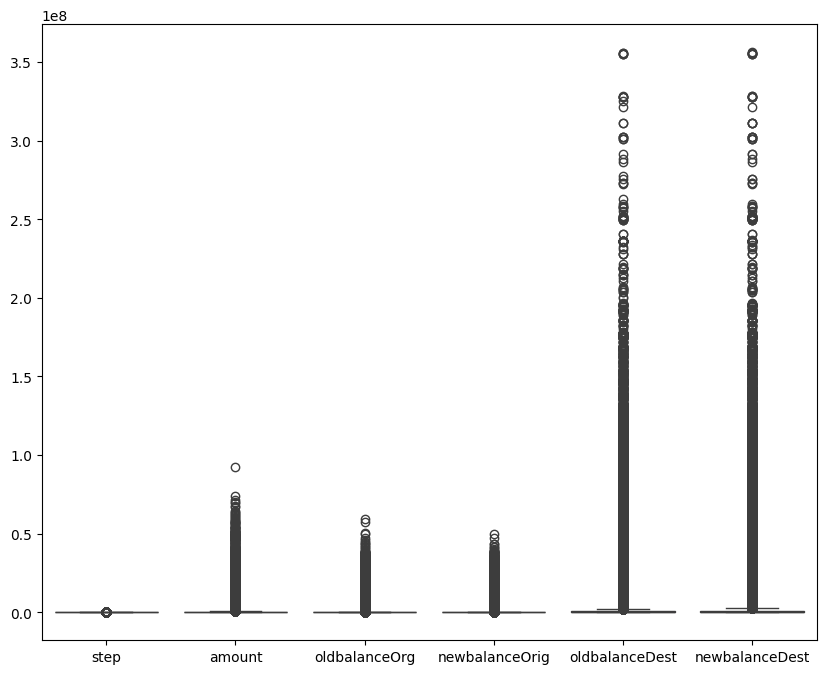

In [6]:
#box plot (numerical)

plt.figure(figsize=(10,8))
sns.boxplot(data=numerical_data)
plt.show()

Sample size: 12725 (0.2%)


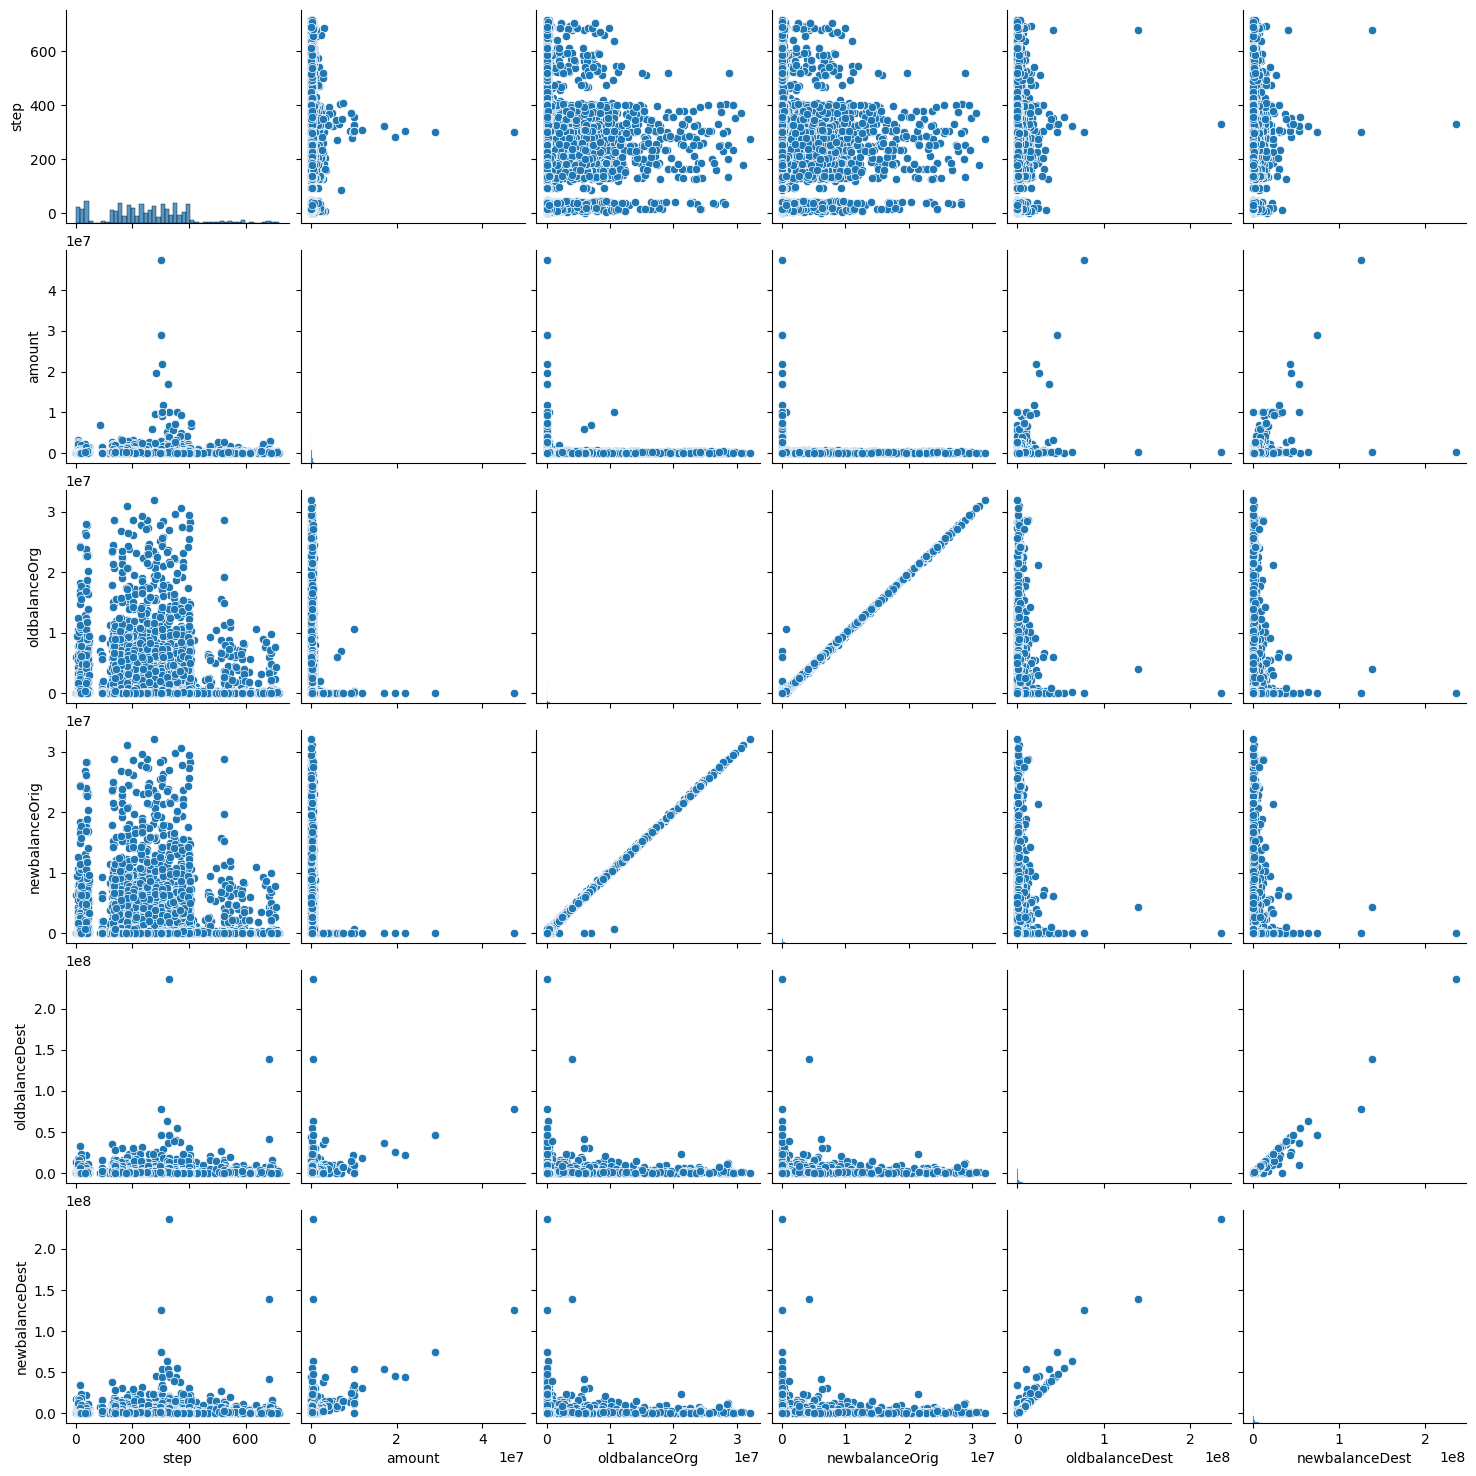

In [7]:
# matix scatter plot (numerical)

numerical_data_sample = numerical_data.sample(frac=0.002)
print("Sample size: {} ({}%)".format(numerical_data_sample.shape[0], round((numerical_data_sample.shape[0]/data.shape[0])*100,3)))
sns.pairplot(numerical_data_sample)
plt.show()

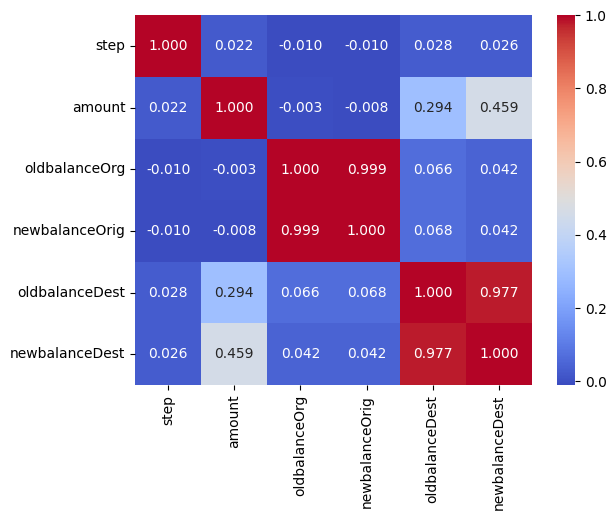

In [8]:
# correlation matrix (numerical)

corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.show()

Categorical variables
- Each transaction has differernt name
- Name variables can be removed 

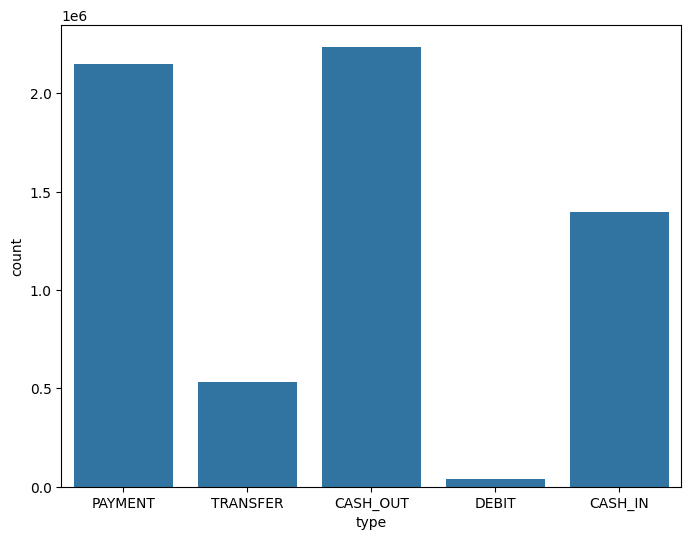

In [9]:
# bar plot (categorical)

plt.figure(figsize=(8,6))
sns.countplot(x='type', data=data)
plt.show()

# nameOrig and nameDest plots are not informative
# plt.figure(figsize=(8,6))
# sns.countplot(x='nameOrig', data=sampled_data)
# plt.show()

# plt.figure(figsize=(8,6))
# sns.countplot(x='nameDest', data=sampled_data)
# plt.show()


In [10]:
# labels

num_isFraud = data['isFraud'].sum()
print('isFraud transactions: {} ({}%)'.format(num_isFraud, (num_isFraud/data.shape[0])*100))

num_isFlaggedFraud = data['isFlaggedFraud'].sum()
print('isFlaggedFraud transactions: {} ({}%)'.format(num_isFlaggedFraud, (num_isFlaggedFraud/data.shape[0])*100))

isFraud transactions: 8213 (0.12908204481801522%)
isFlaggedFraud transactions: 16 (0.000251468734577894%)


# Outliers problem

**Option 1: Remove outliers**
- Used IQR method with 1.5 coefficent
- Removed 1.89 million (~30%) units
- Removed all fraud transactions
- Bad option; cannot just remove outliers

**Option 2: Normalize**
- Used z score normalization method
- Mean 0
- SD 1
- Better option since it preserves all fraud data
- Preserves distributions
- Does not let bigger scale variables take over weights (in the future)

In [11]:
# Option 1

numerical_cols = ['amount', 'oldbalanceOrg', 'oldbalanceDest']
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
data_no_outliers = data[~outlier_condition]

diff = data.shape[0]-data_no_outliers.shape[0]
print("Data size: {}\nRemoved: {} ({}%)".format(data_no_outliers.shape[0], diff, round((diff/data.shape[0])*100),3))
no_outliers_isFraud = data_no_outliers['isFlaggedFraud'].sum()
print("isFraud transactions in no outliers data: {}".format(no_outliers_isFraud))

Data size: 4468732
Removed: 1893888 (30%)
isFraud transactions in no outliers data: 0


In [9]:
# Option 2
# normailze data (mean 0, dev 1)
def z_normalize(data):
    mean = data.mean()
    std = data.std()
    normalized_data = (data - mean) / std
    return normalized_data

normalized_data = data.copy()
normalized_data.drop(columns=['isFlaggedFraud'], inplace=True)
normalization_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
normalized_data[normalization_cols] = z_normalize(normalized_data[normalization_cols])
normalized_data.head()

# save csv
normalized_data.to_csv('normalized_data.csv', index=False)


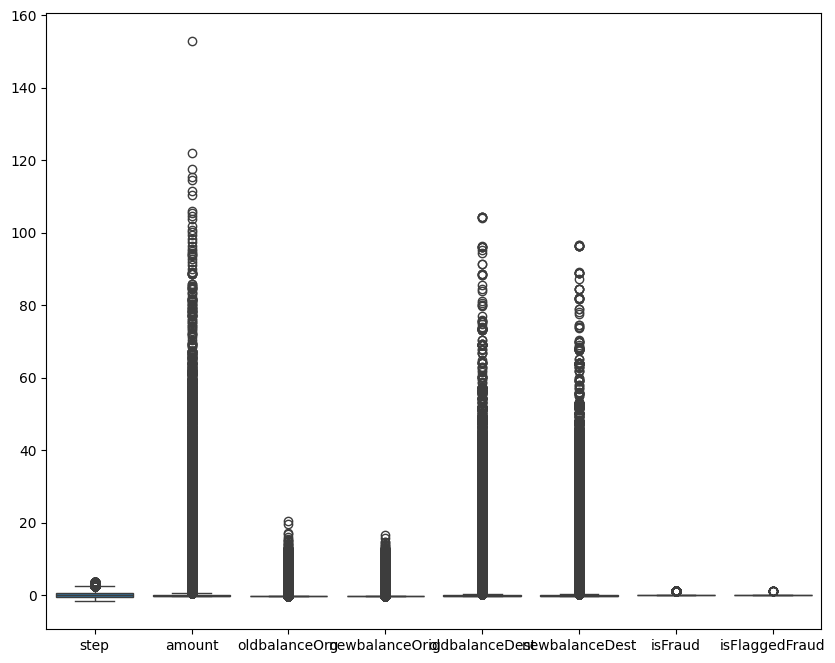

In [13]:
# box plot of normalized data

plt.figure(figsize=(10,8))
sns.boxplot(data=normalized_data)
plt.show()